In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[[0 1 1 ... 0 1 1]
 [0 1 0 ... 0 0 1]
 [0 1 1 ... 1 1 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 1 1 1]]
Enter the number of iterations : 20


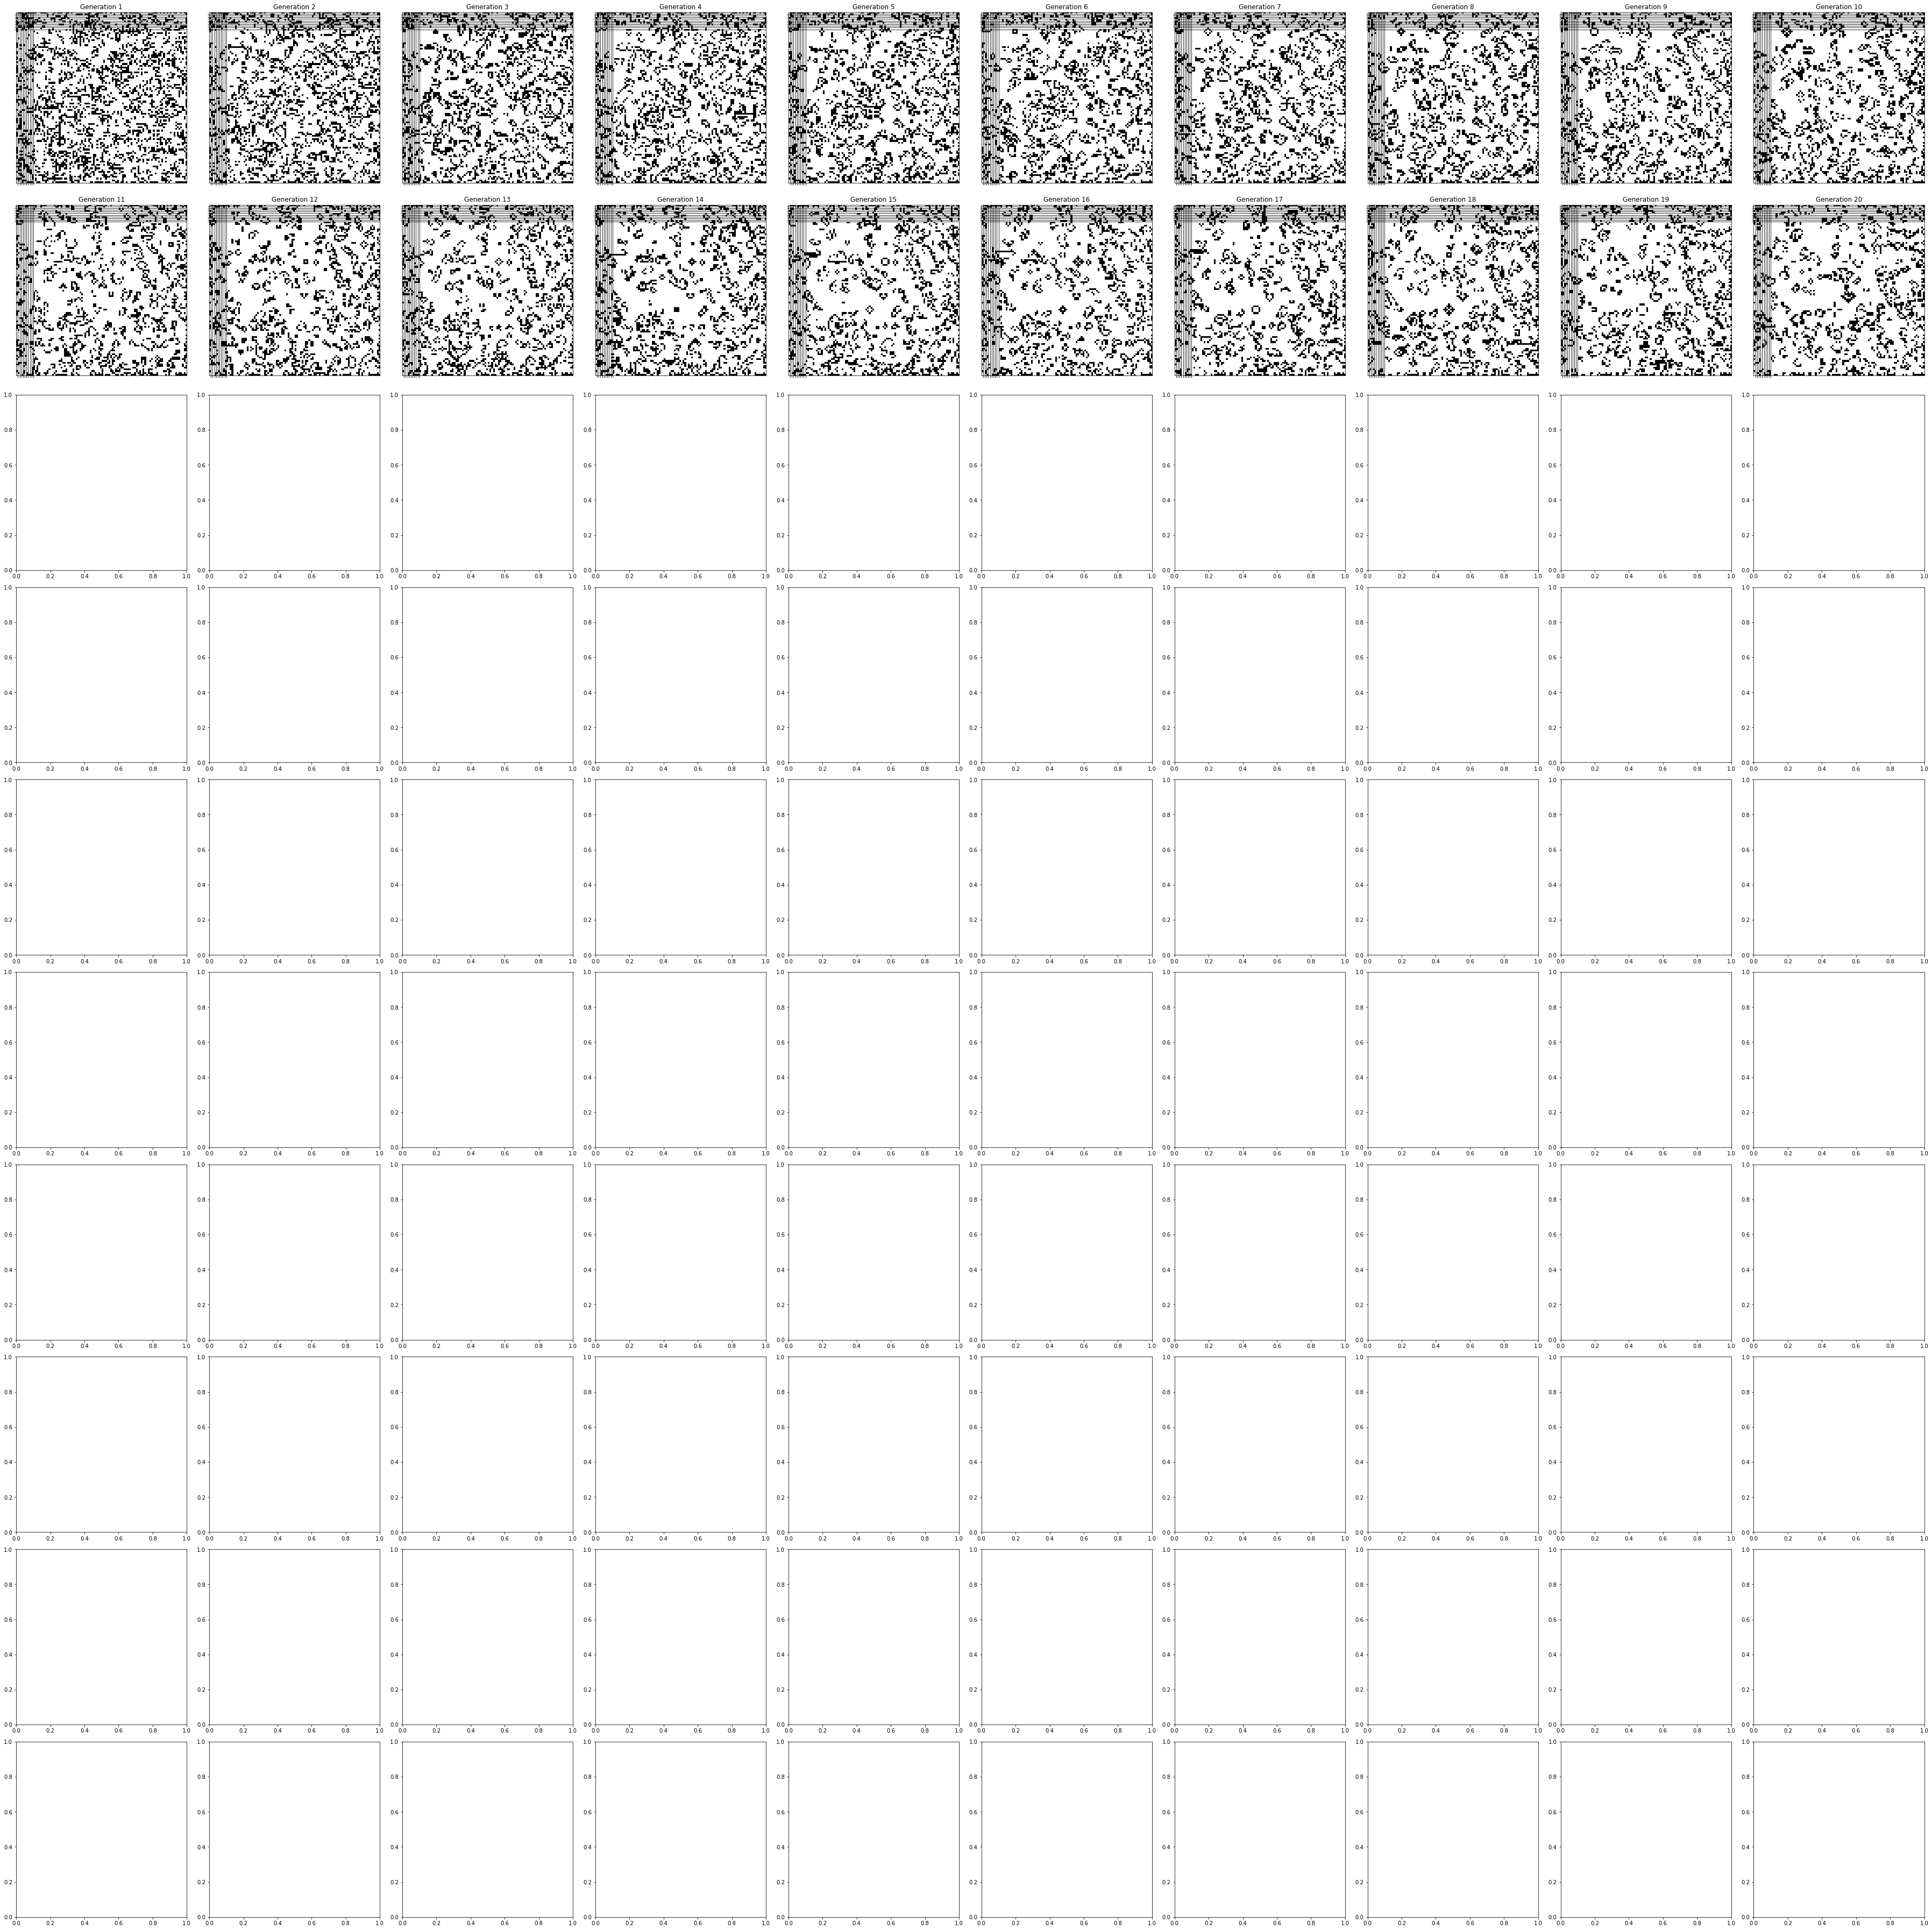

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

def iterate(Z):
    shape = len(Z), len(Z[0])
    N = [[0,]*(shape[0]+2)  for i in range(shape[1]+2)]
    # Compute number of neighbours for each cell
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    # Update cells
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            if Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
            elif Z[x][y] == 1 and not N[x][y] in [2,3]:
                Z[x][y] = 0
    return Z

# The 'beehive' pattern
'''
Z = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
     
'''

Z = np.random.randint(2, size=(100,100))

print(Z)


     
    
n_generations = int(input("Enter the number of iterations : "))
fig, axes = plt.subplots(10, 10, figsize=(50, 50))
for i in range(n_generations):
    iterate(Z)
    ax = axes.flat[i]
    ax.imshow(Z, interpolation='nearest', cmap=plt.cm.binary)
    ax.grid(True, color="k")
    ax.set_xticks(np.arange(10)+.5)
    ax.set_yticks(np.arange(10)+.5)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_title('Generation {}'.format(i+1))

plt.tight_layout()
plt.show()
